Importu

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [116]:
dataframe = pd.read_json("vacancy_data.json", orient="records")

In [117]:
type(dataframe)
column_names = dataframe.columns.values

In [118]:
dataframe.sample(10)

,company_name,contract_type,description,introduction,job_category,location,vacancy_title
1565,Dominos,parttime,"At Domino’s Pizza we’re looking for people with lots of energy and get up and go, a positive attitude and a willingness to succeed. Have you got the right ingredients? Experience isn’t necessary a...",Unknown,catering,Limerick - Castletroy,In Store Crew
3336,Dominos,parttime,Can you Deliver? Are you passionate about Customer Service? You need to have a full UK or EU Driving License. Experience isn’t necessary as we’ll provide you with a full induction and training pro...,Unknown,logistics,Worksop,Driver using own vehicle
3355,Dominos,parttime,Can you Deliver? Are you passionate about Customer Service? You need to have a full UK Driving License. Experience isn’t necessary as we’ll provide you with a full induction and training programme...,Unknown,logistics,London - Edmonton,Driver using a company bike
1886,Lidl,Unknown,"The variety and pace that comes with every shift as a Customer Assistant at Lidl needs dedication and flexibility. Our stores are open Monday to Sunday so you’ll need to be able to work weekends, ...",Unknown,retail,Shelf,Customer Assistant - 21-30 hours - Shelf
496,Enterprise,internship,"Overview Add an annual turnover of $24 billion to a rental and leasing fleet of over 1.9 million vehicles spread across 10,000 locations worldwide and you get Enterprise Rent-A-Car – a business t...",Unknown,management,Somerset,One Year Management Placement - Somerset
282,Primark,Part time,Are you a retail lover with a passion for customer service? We’re looking for enthusiastic individuals with the right attitude to join our store as a Retail Assistant. Whether it’s a part time rol...,Unknown,retail,Unknown,Temporary Retail Assistant - Mon to Fri 17.00-21.00 in Carlisle | Primark Careers
3154,Morrisons,Unknown,"About The Role Retail is at the heart of our business, we’re proud to be the UK’s fourth largest supermarket serving more than 11 million customers each week across our growing network of around...",Unknown,retail,Stewartfield,Team Manager - Meat and/or Fish
492,H&M,Unknown,DEPARTMENT MANAGER - BASINGSTOKE. Are you ready to lead and inspire your team to achieve fantastic sales figures? Find your place in a fast moving environment where you interact with both custom...,Unknown,retail,BASINGSTOKE FESTIVAL PLACE,Department Manager
2319,Wetherspoon,Part-time,"The Ideal Candidate We want fun, enthusiastic, confident and passionate people who are not afraid of hard work. We recruit our team for their personality and as a UK top employer with an award wi...",Unknown,catering facility,Wrexham,"Bar Staff The North and South Wales Bank, Wrexham"
461,GreeneKing,internship,,Unknown,catering,,Greene King Apprenticeships Jobs


In [119]:
def transform_dataframe(dataframe):
    '''
    transform the data to new unit with ['label', 'text'] as columns
    '''
    columns = dataframe.columns.values
    return pd.melt(dataframe, value_vars=columns, var_name='label', value_name='text',)


melted_dataframe = transform_dataframe(dataframe)
melted_dataframe.sample(15)

,label,text
6453,contract_type,parttime
10627,introduction,The Groom Room at Pets at Home is looking for Apprentice Groomers to join our quickly expending Groom Room business.
9640,description,"Can you Deliver? Are you passionate about Customer Service? You need to have a full UK (for our UK/NI stores), full Irish (for our ROI stores) or EU Driving License and be at least 18 years old. E..."
3265,company_name,Dominos
17441,job_category,logistics
7051,contract_type,internship
3851,contract_type,parttime
21859,vacancy_title,Store Assistant - DAYS
5944,contract_type,Full-time
5743,contract_type,Full-time


In [120]:
    def remove_values(dataframe, value):
        '''
        The data has some 'unknown' values, as where the scrapetool didnt find any data for that category
        3997 rows contained an unknown value. introduction(2898), contract_type(1066), location(33)
        '''
        unknowns_df = dataframe[dataframe.text == value]
        #self.metrics(dataframe)
        print(
        f'''
        removing missing values from the dataset
         ''')
        cleaned_df = dataframe[~dataframe.text.str.contains(value)]
        if cleaned_df[cleaned_df.text=='Unknown'].shape[0] == 0: print(f"all '{value}' removed")
        print(f'Removed {dataframe.shape[0] - cleaned_df.shape[0]} {value}')
        return cleaned_df
    
dataframe = remove_values(melted_dataframe, 'Unknown')


    removing missing values from the dataset
     
all 'Unknown' removed
Removed 3997 Unknown


In [107]:
def metrics(dataframe):
    '''
    Some metrics:
    - How many observations per label?
    - how many observations in total
    '''
    print(f"Observations per label: \n{dataframe['label'].value_counts()}")
    print(f"Total Observations: {dataframe.shape[0]}")

metrics(dataframe)

Observations per label: 
description      3533
job_category     3533
vacancy_title    3533
company_name     3533
location         3500
contract_type    2467
introduction      635
Name: label, dtype: int64
Total Observations: 20734


In [108]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 200)

In [109]:
dataframe['text_length'] = dataframe['text'].str.len()
dataframe
# dataframe.index
# dataframe.loc['location', dataframe.loc['text_length'] > 30]
locations = dataframe[dataframe['label'] == 'location']
locations[locations['text_length'] > 45]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,label,text,text_length
17704,location,Wakefield Woolley Edge M1 Southbound Travelodge,47
17743,location,"brighton, brighton and hove - the united kingdom",48
17791,location,"kingston upon thames, greater london - the united kingdom",57
17863,location,"Burton-On-Trent, Centrum East Retail Park (L02205)",50
17994,location,"Chelmsford, Chelmer Village Retail Park (L02854)",48
18755,location,Peterborough - 57-58 Queensgate Centre - 0074 - F,49
19393,location,North Finchley - Great North Leisure Park - 0654 - F,52
19508,location,Sunderland - Sunderland Retail Park - 0995 - F,46
20309,location,West Sussex - Unit 27-28 Market Place Shopping Centre,53


In [110]:
def unique(dataframe):
    #print(dataframe['text'].shape[0])
    #print(dataframe['text'].unique().shape[0])
    dropped_df = dataframe.drop_duplicates()
    #print(dataframe.groupby('label').nunique())
    #print(dataframe['text'].duplicated(keep='first').sum())
    #print(dataframe.loc[dataframe.duplicated(keep='first'), :])
    return dropped_df

unique_dataframe = unique(dataframe)
metrics(unique_dataframe)

Observations per label: 
location         1703
vacancy_title    1532
description      1474
company_name       31
introduction       30
contract_type      12
job_category       11
Name: label, dtype: int64
Total Observations: 4793


In [111]:
def splitting_dataset(dataframe):
    '''
    Splitting the test and train dataset
    '''
    text = dataframe['text'].values
    y = dataframe['label'].values

    text_train, text_test, y_train, y_test = train_test_split(
            text, y, test_size=0.25, random_state=2)

    return text_train, text_test, y_train, y_test, text, y

text_train, text_test, y_train, y_test, text, y = splitting_dataset(unique_dataframe)

In [123]:
def model_pipeline(wanted_clf):
        '''
        training pipeline
        '''
        classifiers = {
                  'NB': MultinomialNB(),
                  'SVM': SVC(C=1.0, kernel='linear', degree=3, gamma='auto'),
                  'SGD': SGDClassifier(),
                  'LR': LogisticRegression(),
                  'DT': DecisionTreeClassifier(),
                  'RF': RandomForestClassifier()
                  }


        model = Pipeline([('vect', CountVectorizer(stop_words='english')),
                       ('tfidf', TfidfTransformer()),
                       ('clf', classifiers[wanted_clf]),
                      ])

        return model

def train_model(text_train, y_train, wanted_clf):
    model = model_pipeline(wanted_clf)
    model.fit(text_train, y_train)
    #print(model.get_support())
    #y_pred = model.predict(text_test)
    return model


def linear_reg_report(X, y):
    clf = train_model(X, y, 'LR')
    names = clf.named_steps['vect'].get_feature_names()
    data = {}
    for i, label in enumerate(column_names):
        coefficent = np.argsort(clf.named_steps['clf'].coef_[i])[-10:]
        names = clf.named_steps['vect'].get_feature_names()
        #print(label, names,  coefficent)

        data[label] = [names[j] for j in coefficent]

    feature_coeff = pd.DataFrame(data)


    return feature_coeff
        
linear_reg_report(text, y)

,company_name,contract_type,description,introduction,job_category,location,vacancy_title
0,wetherspoon,powerplant,people,steakhouse,prepares,lon,hours
1,lidl,permanent,service,looking,marketing,centre,member
2,op,internship,training,uk,promotion,surrey,2019
3,dominos,holiday,working,secret,management,greater,customer
4,mcdonalds,weekend,experience,workplace,logistics,glasgow,bar
5,inditex,temporary,team,pub,reception,region,kitchen
6,marksandspencer,parttime,customers,hospitality,retail,west,manager
7,newlook,fulltime,role,restaurant,facility,park,cleaner
8,sainsburys,traineeship,work,restaurants,catering,london,assistant
9,greeneking,time,ll,kfc,customer_service,gb,staff


In [ ]:
def grid_search(self, X, y, wanted_clf): #?????
    param_grid = {'n_estimators': [10, 100, 1000], 'max_features': [5, 10, 20, 30]}
    clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=make_scorer(accuracy_score))

In [17]:
def decision_tree_report(X_train, y_train, clf):

    #print(clf.named_steps['vect'].get_feature_names())
    print(clf.named_steps['vect'].vocabulary_.keys())
    #print(clf.named_steps['clf'].feature_importances_)

    # feature_importances = pd.DataFrame(clf.named_steps['clf'].feature_importances_,
    #                            index = self.column_names,
    #                             columns=['importance']).sort_values('importance', ascending=False)
    #
    # print(feature_importances)

In [37]:
def cross_validation(X, y, wanted_clf):
    #self.features(X, y)
    skf = StratifiedKFold(n_splits=10)
    clf = train_model(X, y, wanted_clf)
    scores = cross_val_score(clf, X, y, cv=skf)
    y_pred = cross_val_predict(clf, X, y, cv=skf)
    return scores, y_pred

In [41]:
def visualisations(title, y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    #print(conf_mat)
    columns = column_names
    fig, ax = plt.subplots(figsize=(10,6))
    sns.heatmap(conf_mat, annot=True, fmt='d',
        xticklabels=columns, yticklabels=columns)
    plt.title(title, fontdict=None, loc='center', pad=None)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    #plt.savefig(f'figure-{timestamp}.png')
    plt.show()
    plt.close()

In [44]:
def predictions(model, text_test):
    predictions = model.predict(text_test)
    return predictions

y_pred = predictions(model, text_test)

In [44]:
def scoring(y_test, y_pred):
    accuracy = 'accuracy %s' % accuracy_score(y_pred, y_test)
    columns = column_names
    report = classification_report(y_test, y_pred,target_names=columns)
    return accuracy, report


In [18]:
def kijkdoos(text_test, y_test, y_pred):
    d = {'Text': text_test, 'Label': y_test, 'Predicted': y_pred}
    df = pd.DataFrame(d)
    print(df[df.Label != df.Predicted].sample(n=20))



In [45]:
def cross_validation_report(clf, X, y, data_size='all', data_unique=True):
    scores, y_pred = cross_validation(X, y, clf)
    mean = scores.mean()
    accuracy, report = scoring(y, y_pred)
    print(f'''
    Cross Validation on trained model\n
    classifier: {clf}
    Mean score: {mean}
    {accuracy}
    Data: {data_size}
    Unique: {str(data_unique)}\n
    \n{report}
    ''')
    title = f'Cross Validation: {clf} - Data: {data_size} Unique: {str(data_unique)}'
    visualisations(title, y, y_pred)
    kijkdoos(X,y,y_pred)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed


    Cross Validation on trained model

    classifier: LR
    Mean score: 0.953080917192952
    accuracy 0.953056540789
    Data: all
    Unique: True

    
               precision    recall  f1-score   support

 company_name       0.00      0.00      0.00        31
contract_type       0.00      0.00      0.00        12
  description       0.99      1.00      0.99      1474
 introduction       0.00      0.00      0.00        30
 job_category       0.00      0.00      0.00        11
     location       0.90      1.00      0.95      1703
vacancy_title       0.99      0.92      0.95      1532

    micro avg       0.95      0.95      0.95      4793
    macro avg       0.41      0.42      0.41      4793
 weighted avg       0.94      0.95      0.94      4793

    


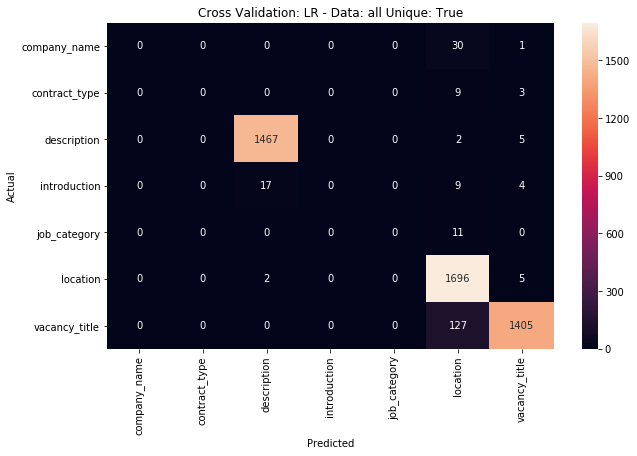

                                                   Text          Label  \
3382                     Digital Acquisition Specialist  vacancy_title   
13                                          Wetherspoon   company_name   
3800                                             Porter  vacancy_title   
2616                                        Potters Bar       location   
1550                                          logistics   job_category   
4029                          Logistics OMNI Super User  vacancy_title   
1544  KFC is looking to recruit Team Members for our...   introduction   
3320  SALES ASSISTANT ZARA AND PULL & BEAR BRIGHTON ...  vacancy_title   
4787                      Support Pharmacist - Devizes   vacancy_title   
4266  Customer Care Advisors – Native French Speaker...  vacancy_title   
1533  From career progression and working within you...   introduction   
3399                                Visual Merchandiser  vacancy_title   
1570                                  

In [56]:
cross_validation_report('LR', text, y)

![gif](https://media.giphy.com/media/rAm0u2k17rM3e/giphy.gif "help")

In [5]:
import requests
import xml.etree.ElementTree as ET

def xml_parser():
    r = requests.get('https://www.studentjob.co.uk/vacancies.xml')
    tree = ET.fromstring(r.text)
    count = 0
    unit = {}
    for job in tree.iter('JobDetails'):
        unit[count] = {}
        for job2 in job:

            unit[count].update({job2.tag: job2.text})

        count += 1
    print(count)
    return unit


vacs = xml_parser()
#print(vacs[2]['JobTitle'])

df = pd.DataFrame.from_dict(vacs, orient='index')
print(df)

305
                                              JobTitle  \
0    Earn money taking surveys made just for you wi...   
1      Part-time/student jobs as a babysitter or nanny   
2                      FINAL CALL – Summer Tech Tutors   
3    Complete Surveys and Offers to Earn Money from...   
4    Earn up to £300 a month answering surveys with...   
5    MEP Hospitality Staffing - Part-time and Full-...   
6      Internship – International Researcher in London   
7    Paid Bar &amp; Event Staff for Festivals and E...   
8    Discover Europe for free – Become a Mentor for...   
9    Part-time Tutoring &amp; Teaching jobs across ...   
10   Earn £300+ in your spare time by completing si...   
11         Survey Takers needed - Earn money from home   
12   Urgent Immediate Start - Completing Online Off...   
13   Charity Fundraiser – Excellent Pay - Lifesavin...   
14              VIP Hospitality Event Staff  in London   
15           Bar Staff at British Summer Time Festival   
16   Waiti